# Introduction to Classification

Classification is a machine learning algorithm that allows records to be classified; that is assigned a pre-determined label. 

For instance we can use patient details such as weight, height, blood pressure, and blood-glucose levels to predict whether a patient is diabetic.

_Categorical_ data has 'classes' rather than numeric values. So in categorical data we can find sets of values like ['tree', 'plant', 'shrub'], or ['dog','cat','mouse']. In certain cases the label might be a numerical value such as a price, in that case the value can be changed to a label such as ['not expensive', 'moderate', 'expensive'].

## Different types of Classification

A classification can be _binary_ that could label a patient as non-diabetic or diabetic. When a prediction is made, a probability value is assigned along with the label. This value ranges from 0 (impossible) to 1 (certain). 

This means that if a person is labelled as diabetic with a probablity of 0.7, it means that there's a chance of being 70% diabetic, and 30% chance of not being diabetic.

Usually, a threshold is set at 0.5, to determine which label will be allocated.

## Training and evaluating a classification model

Classification is a supervised machine learning technique. This means that the labels are given beforehand. These labels will be used by the algorithm to 'learn' the probability of of which features affect the outcome of the label. This model can then be used to 'predict' a label on observations that do not have a label.

## Simple Example

The following readings are an example of the blood-glucose level, and whether a person is diabetic or not.

In [2]:
# importing libraries
import pandas as pd

# create test dataset
df = pd.DataFrame({'blood-glucose': [82,92,112,102,115,107,87,120,83,119,104,105,86,109],
                     'diabetic': [0,0,1,0,1,1,0,1,0,1,1,0,0,1]})

Let's plot the first 8 values of the readings.

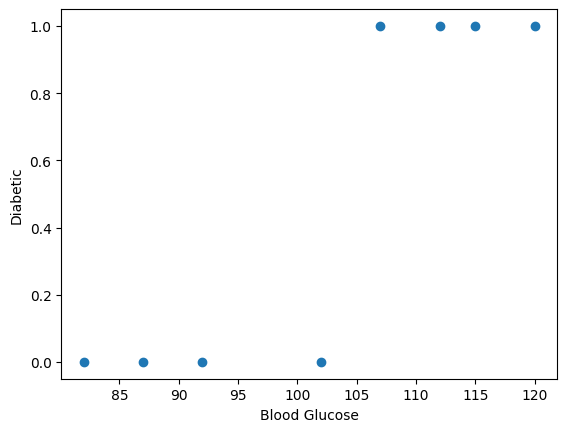

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['blood-glucose'].head(8), df['diabetic'].head(8))
plt.ylabel('Diabetic')
plt.xlabel('Blood Glucose')
plt.show()

At a quick glance, this shows us that the higher the blood-glucose the more chance that a person is diabetic.

We need a function that calculates the probability value for y based on x $f(x)=y$.

We can do a logistic function (similar to regression covered in previous topics). Let's generate a sigmoidal (S-shaped) curve.

We will still use the first 8 values of the readings.

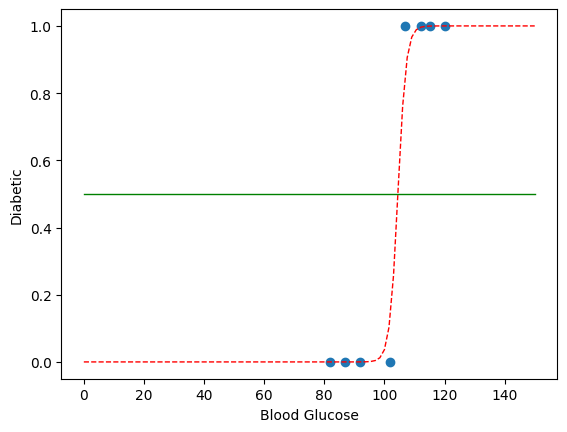

In [ ]:
# import libraries for model trainin
from sklearn import linear_model
from scipy.special import expit
import numpy as np

# segregate the predictor and targer 
x = pd.Series(df['blood-glucose'].head(8).array).values.reshape(-1,1)
y = df['diabetic'].head(8).array

model = linear_model.LogisticRegression().fit(x, y)

plt.clf()
plt.scatter(x,y)

x_test = np.linspace(0, 150, 100)
loss = expit(x_test * model.coef_ + model.intercept_).ravel()

plt.plot(x_test, loss, color='red', lw=1, linestyle='--')
plt.ylabel('Diabetic')
plt.xlabel('Blood Glucose')

plt.plot([0,150], [0.5, 0.5], linewidth=1, color='green')

Now we can use the function to calculate the probality that a y is positive (diabetic), by using any value from x. We can set the threshold to 0.5.

In [12]:
remaining_data = df.tail(6).copy()

prediction = model.predict(pd.Series(remaining_data['blood-glucose'].array).values.reshape(-1,1))

remaining_data['prediction'] = prediction
remaining_data

,blood-glucose,diabetic,prediction
8,83,0,0.0
9,119,1,1.0
10,104,1,0.0
11,105,0,1.0
12,86,0,0.0
13,109,1,1.0


Now we can compare the predicted values with the actual values.

In the next example we will do a proper example with multiple features and include the evaluation of the model as well.